<a href="https://colab.research.google.com/github/youngchul-sung/deep-learning-with-python/blob/master/6_2_understanding_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

from tensorflow import keras
keras.__version__

TensorFlow 2.x selected.


'2.2.4-tf'

In [0]:
from tensorflow.keras.layers import SimpleRNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [7]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 68s 3ms/sample - loss: 0.6775 - acc: 0.5683 - val_loss: 0.6198 - val_acc: 0.6732
Epoch 2/10
20000/20000 [==============================] - 68s 3ms/sample - loss: 0.4713 - acc: 0.7871 - val_loss: 0.4803 - val_acc: 0.7726
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/sample - loss: 0.3164 - acc: 0.8698 - val_loss: 0.8856 - val_acc: 0.6672
Epoch 4/10
20000/20000 [==============================] - 66s 3ms/sample - loss: 0.2362 - acc: 0.9075 - val_loss: 0.5185 - val_acc: 0.7672
Epoch 5/10
20000/20000 [==============================] - 65s 3ms/sample - loss: 0.1854 - acc: 0.9301 - val_loss: 0.5823 - val_acc: 0.7320
Epoch 6/10
20000/20000 [==============================] - 65s 3ms/sample - loss: 0.1227 - acc: 0.9571 - val_loss: 0.6590 - val_acc: 0.8062
Epoch 7/10
20000/20000 [==============================] - 66s 3ms/sample - loss: 0.0790 - acc: 0.9739 - val_loss: 0.4

In [0]:
import matplotlib.pyplot as plt

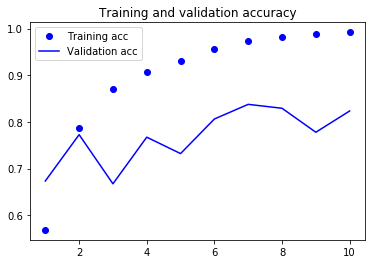

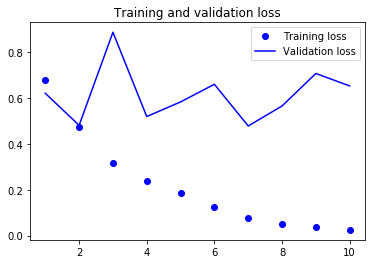

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 839us/sample - loss: 0.5285 - acc: 0.7516 - val_loss: 0.3526 - val_acc: 0.8668
Epoch 2/10
20000/20000 [==============================] - 14s 717us/sample - loss: 0.3015 - acc: 0.8795 - val_loss: 0.3004 - val_acc: 0.8776
Epoch 3/10
20000/20000 [==============================] - 14s 719us/sample - loss: 0.2323 - acc: 0.9129 - val_loss: 0.2824 - val_acc: 0.8910
Epoch 4/10
20000/20000 [==============================] - 14s 716us/sample - loss: 0.1995 - acc: 0.9276 - val_loss: 0.2938 - val_acc: 0.8922
Epoch 5/10
20000/20000 [==============================] - 14s 719us/sample - loss: 0.1739 - acc: 0.9370 - val_loss: 0.2913 - val_acc: 0.8806
Epoch 6/10
20000/20000 [==============================] - 14s 720us/sample - loss: 0.1596 - acc: 0.9424 - val_loss: 0.3530 - val_acc: 0.8410
Epoch 7/10
20000/20000 [==============================] - 14s 722us/sample - loss: 0.1463 - acc: 0.9494 -

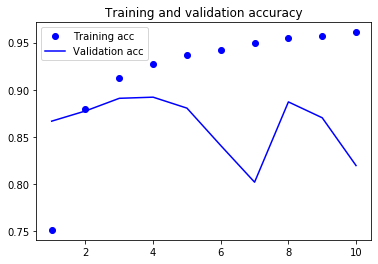

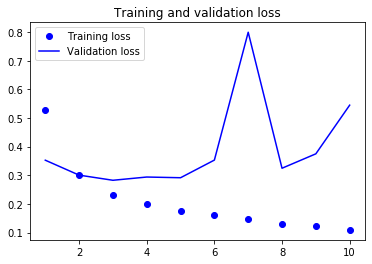

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()